In [1]:
import warnings
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from game import Game
from models import Player, Land, MockPlayer
from utils.fc import get_df_over_increase, create_mock_game, simulation, merge_dfs, get_diff, get_df_columns_mean, get_df_columns_sum
from utils.mpl import plot_scatter, plot_line_with_scatter

In [2]:
df = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,group=False)
df1 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='vampirao', rarity='common', group=False)
df2 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='vampirao', rarity='uncommon', group=False)
df3 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='vampirao', rarity='rare', group=False)
df4 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='vampirao', rarity='epic', group=False)
df = merge_dfs(dfs=[df, df1, df2, df3, df4], column='energy', pk='day', limits=(20,30))


# COMPARING ATTACKS BETWEEN RARITYS

In [3]:
df

,day,no_hero,common,uncommon,rare,epic
20,11.0,-54.45,-40.63,-30.32,-19.53,-8.75
21,11.0,-52.96,-44.68,-34.44,-21.08,-9.29
22,12.0,-54.42,-46.71,-29.89,-21.02,-14.03
23,12.0,-56.15,-43.81,-30.35,-15.58,-8.83
24,13.0,-52.09,-41.56,-32.76,-19.23,-10.49
25,13.0,-55.32,-46.45,-30.92,-19.60,-9.53
26,14.0,-53.89,-42.12,-31.73,-21.19,-9.17
27,14.0,-57.88,-37.88,-29.39,-15.80,-13.52
28,15.0,-52.82,-45.54,-32.22,-13.56,-4.95
29,15.0,-53.99,-44.82,-34.85,-21.31,-9.84


# TOTAL ENERGY AFTER 10 ATTACKS

In [4]:
df_sum = get_df_columns_sum(df, ['no_hero','common', 'uncommon', 'rare', 'epic'])
df_sum

,no_hero,common,uncommon,rare,epic
0,-543.97,-434.2,-316.87,-187.9,-98.4


Text(0.5, 1.0, 'Total Energy Spent After 10 Attacks')

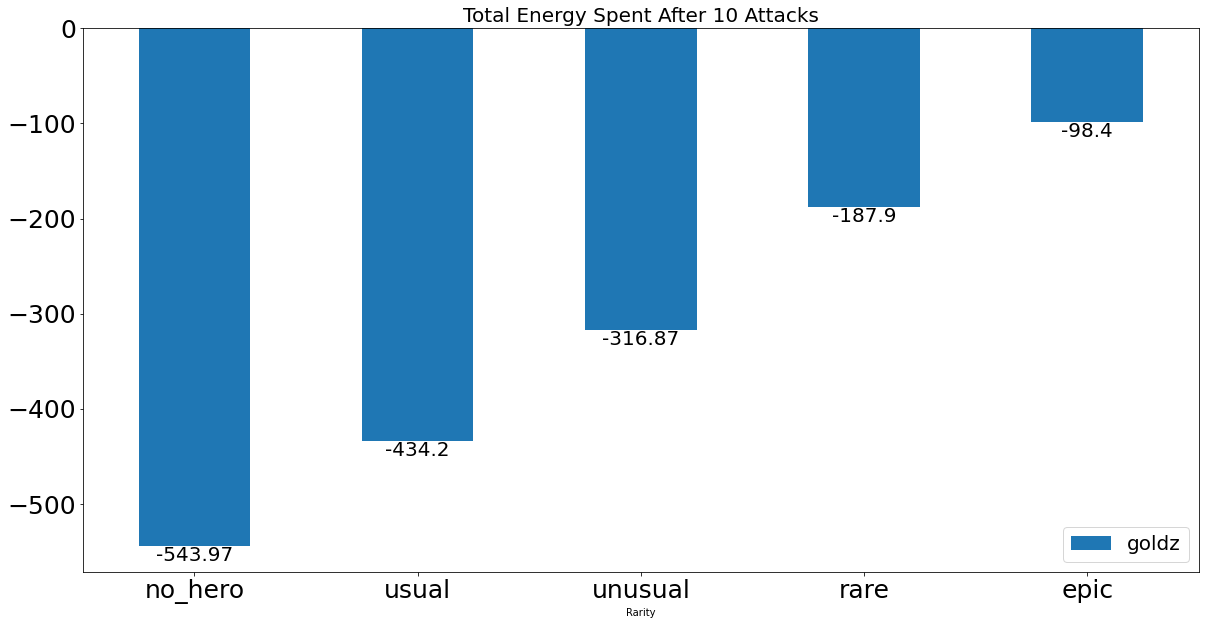

In [5]:
df_sum = pd.DataFrame({'heroes':df_sum.columns, 'goldz':df_sum.iloc[0].to_list()})

ax = df_sum.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})
ax.set_ylabel(None,fontsize=20)


ax.set_title(f"Total Energy Spent After 10 Attacks", fontsize=20)

# ENERGY AVERAGE ON EACH ATTACK

In [6]:
df_mean = get_df_columns_mean(df, ['no_hero','common', 'uncommon', 'rare', 'epic'])
df_mean

,no_hero,common,uncommon,rare,epic
0,-54.397,-43.42,-31.687,-18.79,-9.84


Text(0.5, 1.0, 'Energy Average on Each attack')

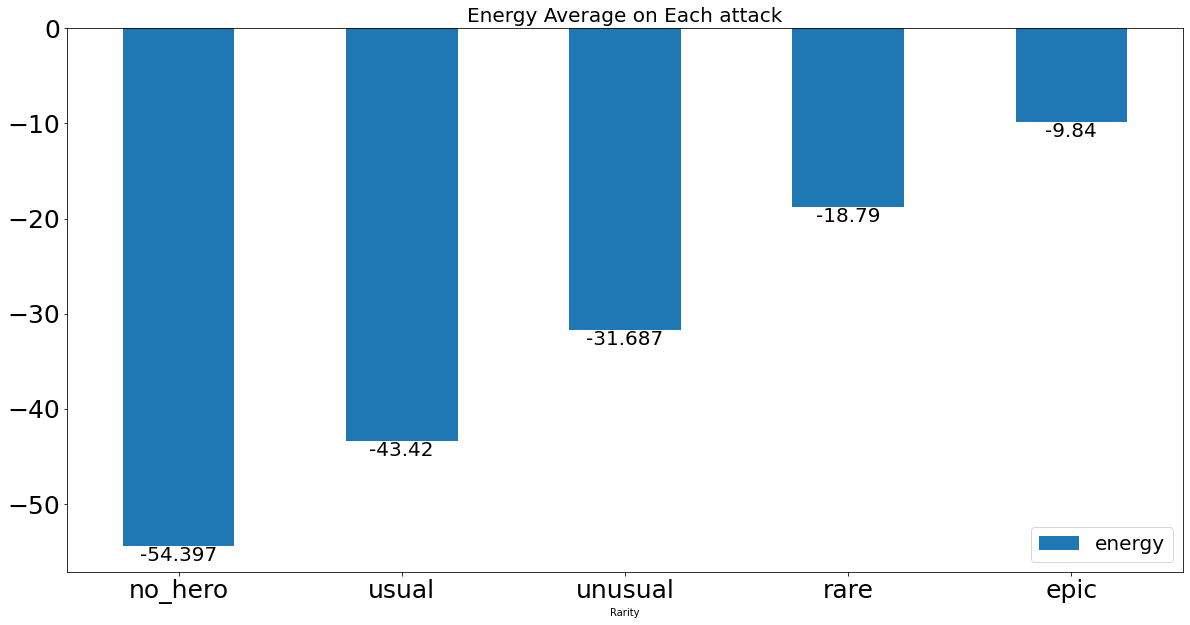

In [7]:

df_mean = pd.DataFrame({'heroes':df_mean.columns, 'energy':df_mean.iloc[0].to_list()})

ax = df_mean.plot.bar(x='heroes', y='energy', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})
ax.set_ylabel(None,fontsize=20)


ax.set_title(f"Energy Average on Each attack", fontsize=20)

# ENERGY DIFFERENCE COMPARED TO NO HERO

In [8]:
df = get_diff(df=df)
df

,day,common,uncommon,rare,epic
20,11.0,13.82,24.13,34.92,45.70
21,11.0,8.28,18.52,31.88,43.67
22,12.0,7.71,24.53,33.40,40.39
23,12.0,12.34,25.80,40.57,47.32
24,13.0,10.53,19.33,32.86,41.60
25,13.0,8.87,24.40,35.72,45.79
26,14.0,11.77,22.16,32.70,44.72
27,14.0,20.00,28.49,42.08,44.36
28,15.0,7.28,20.60,39.26,47.87
29,15.0,9.17,19.14,32.68,44.15


# TOTAL ENERGY SPENT COMPARED TO NO HERO

In [9]:
df_diff_sum = get_df_columns_sum(df, ['common', 'uncommon', 'rare', 'epic'])
df_diff_sum

,common,uncommon,rare,epic
0,109.77,227.1,356.07,445.57


Text(0.5, 1.0, 'Total Diff Energy Compared to No Hero')

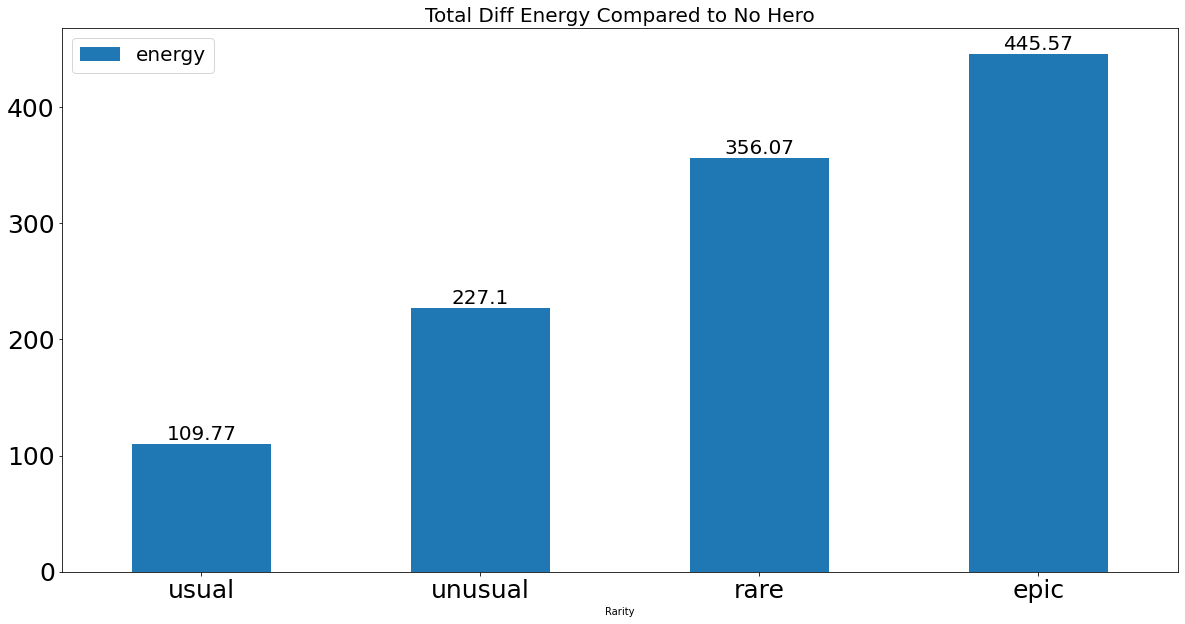

In [10]:
df_diff_sum = pd.DataFrame({'heroes':df_diff_sum.columns, 'energy':df_diff_sum.iloc[0].to_list()})

ax = df_diff_sum.plot.bar(x='heroes', y='energy', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})

ax.set_title(f"Total Diff Energy Compared to No Hero", fontsize=20)

# ENERGY DIFFERENCE SPENT PER ATTACK COMPARED TO NO HERO


In [11]:
df_diff_mean = get_df_columns_mean(df, ['common', 'uncommon', 'rare', 'epic'])
df_diff_mean

,common,uncommon,rare,epic
0,10.977,22.71,35.607,44.557


Text(0.5, 1.0, 'Diff Energy Average per Attack')

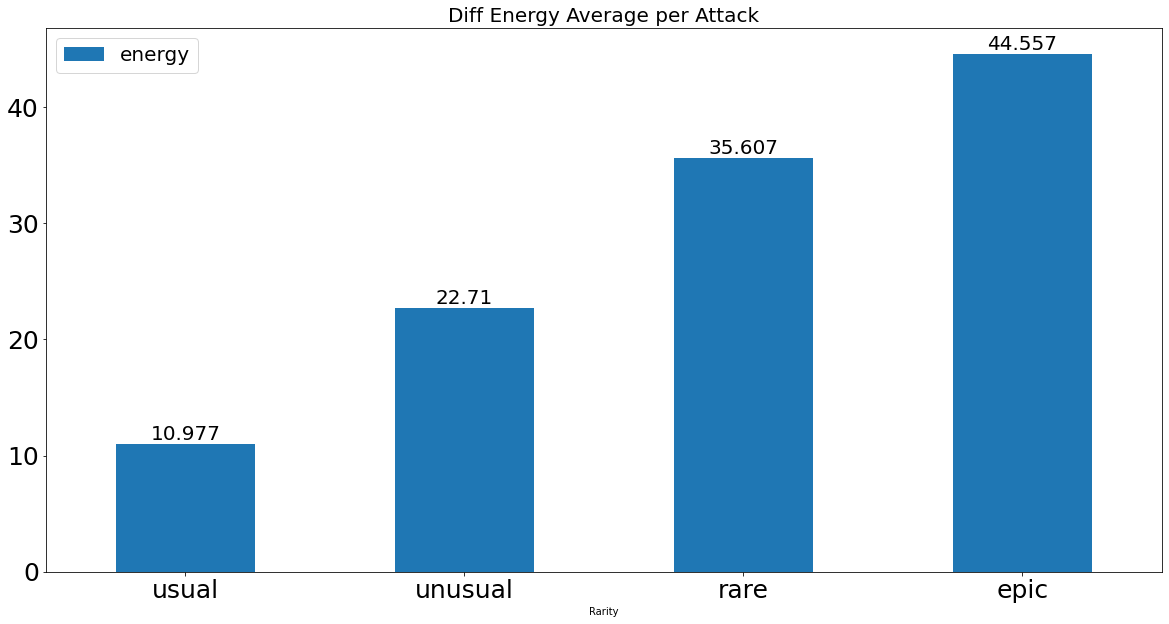

In [12]:
df_diff_mean = pd.DataFrame({'heroes':df_diff_mean.columns, 'energy':df_diff_mean.iloc[0].to_list()})

ax = df_diff_mean.plot.bar(x='heroes', y='energy', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})

ax.set_title(f"Diff Energy Average per Attack", fontsize=20)